In [1]:
!pip install matplotlib
!pip install seaborn

# visualization with python libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = sns.load_dataset("diamonds")
except Exception as e:
        csv_path = '' #diamonds.csv 파일 경로를 복붙해주세요!
        df = pd.read_csv(csv_path)

df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## visualization with Matplotlib

In [2]:
import numpy as np

from matplotlib.colors import Normalize
from matplotlib import colormaps
from matplotlib.markers import MarkerStyle
from matplotlib.text import TextPath

#### 1번 시각화

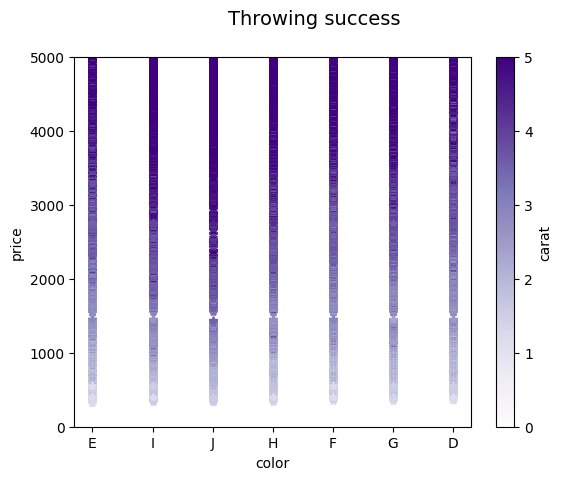

In [3]:
zipped_data = zip(df['carat'], df['cut'], df['color'], df['clarity'], df['price'])

cmap = plt.colormaps["Purples"]
fig, ax = plt.subplots()
fig.suptitle("Throwing success", size=14)
for carat, cut, color, clarity, price in zipped_data:
    ax.plot(color,
            price,
            marker='*',
            color=cmap(carat))
fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 5),
                                   cmap=cmap),
             ax=ax, label="carat")
ax.set_xlabel("color")
ax.set_ylabel("price")
ax.set_ylim(0, 5000)

plt.show()

## Visualization with Seaborn

In [4]:
unique_values = df['clarity'].unique()
print(unique_values)

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


#### 2번 시각화

<Axes: xlabel='carat', ylabel='price'>

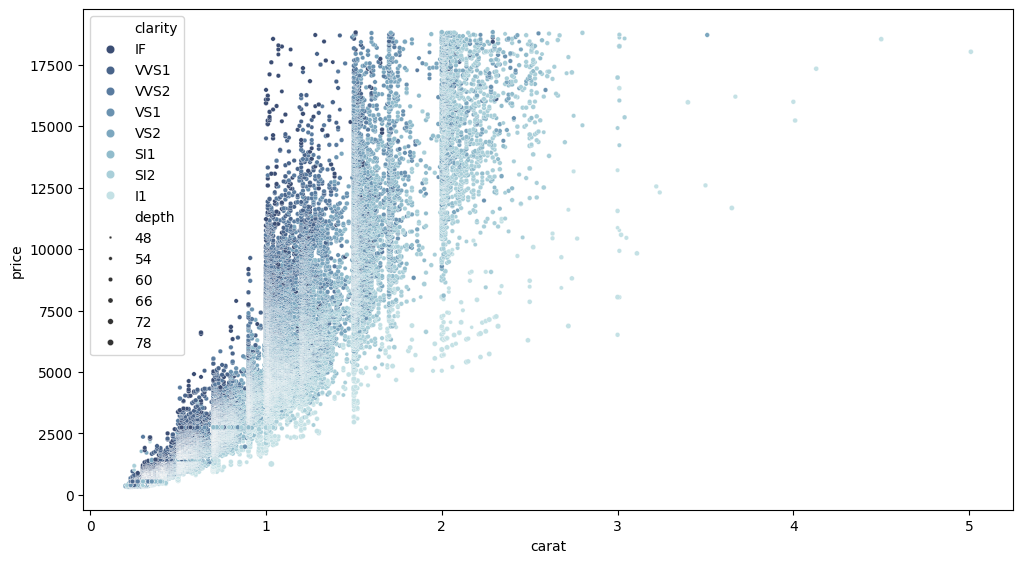

In [5]:
f, ax = plt.subplots(figsize=(12, 6.5))
#sns.despine(f, left=True, bottom=True)
clarity_ranking = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
sns.scatterplot(x="carat",
                y="price",
                hue="clarity",
                size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 20),
                linewidth=0.2,
                data=df, ax=ax)

#### 3번 시각화

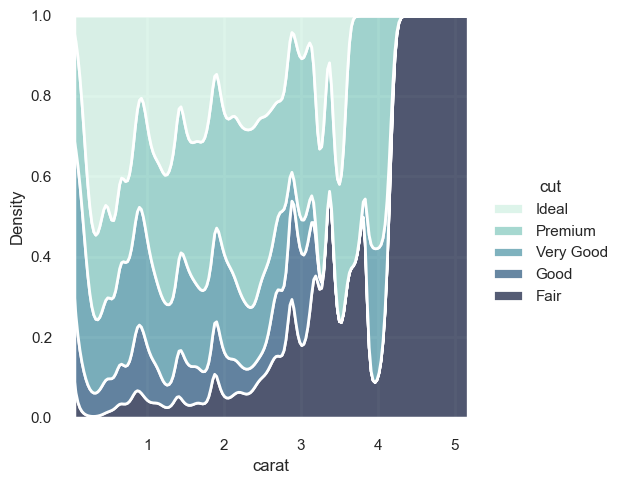

In [6]:
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.3, hue=1,light=0.9",
)

# 시각화 공통과제 1, 2

1. 1, 2, 3번 시각화 각각에 대하여
(1) 발제자료 혹은 외부자료에 근거하며 시각화의 목적과 효과를 평가하고 (2) 개선점을 제안하세요. (300자 이내)

* 
(1번) 다이아몬드의 색상 등급과 가격 분포를 보여주며, 색상이 다이아몬드 색상 등급을, 막대의 진도는 캐럿 무게를 표현합니다. 짙은 색상이 높은 캐럿 값을 나타내어 가치를 시각적으로 표현하고, 색상 등급을 명확하게 분리해 비교 용이성을 제공합니다. 개선점으로는 데이터 포인트의 과도한 겹침과 캐럿 크기 범위를 더 잘 표현할 수 있도록 색상 맵을 개선하는 것이 있겠습니다.

(2번) 다이아몬드의 캐럿 크기와 가격 사이의 관계를 보여주며, 다이아몬드의 투명도를 색상으로, depth를 포인트 크기로 나타냅니다. 투명도 등급의 차이를 쉽게 확인할 수 있어 가격에 미치는 영향을 시각적으로 보여줍니다. 그러나 깊이에 대한 포인트 크기의 범례가 더 명확해야 하며, 작은 캐럿 크기 지역에서 포인트가 밀집되어 있어 오버플로팅 발생이 가능합니다. 개선을 위해 깊이 범례를 개선하고 오버플로팅을 줄이기 위해 투명도를 활용하거나 대안 그래프를 고려해야 합니다.

(3번) 각각의 컷 품질에 따른 캐럿 크기 분포를 보여주는데, 이를 위해 컷 품질에 따른 밀도 곡선을 사용합니다. 각 컷 유형의 분포를 쉽게 비교할 수 있게 해주며, 컷 품질별 캐럿 크기의 상대적 빈도를 시각화합니다. 개선해야 할 점으로는 색상과 가독성, x축 스케일이 있습니다(4.3이상에서 밀도 최대). 색상을 더 명확하게 구별할 수 있는 팔레트를 사용하고, 밀도가 가장 높은 범위에 초점을 맞추는 재조정이 필요합니다.

2. 1, 2, 3번 시각화 중 하나를 골라 1번 문항에서 제안한 대로 개선하세요. (300자 이내) 어떤 파이썬 라이브러리나 데이터 시각화 툴을 이용할지는 자유입니다. matplotlip, seaborn, plotly 공식문서 혹은 (태블로를 사용하고 싶다면) 태블로 시 블로그를 참고하세요.

*  3번 시각화 선택. 개선점 두가지 반영. 색상 팔레트 변경하여 더욱 선명한 구분, 그리고 x축 범위를 제한하여 밀도에 초점 맞춤. 

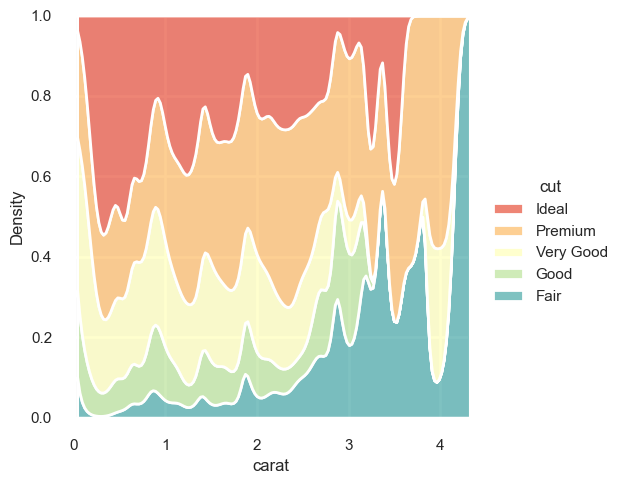

In [18]:
# 여기에 공통과제 2번 코드를 작성해주세요. 주석을 꼼꼼하게 작성하여 왜 이렇게 시각화를 했는지 설명해주시면 더 좋습니다!

# 이전과 동일
sns.set_theme(context='poster',
              style='darkgrid',
              #palette='pastel',
              font='sans-serif',
              font_scale=.5,
              color_codes=True,
              rc=None)

sns.displot(
    data=df,
    x="carat",
    hue="cut",
    kind="kde",
    height=5,
    multiple="fill",
    clip=(0, None),
    palette="Spectral" # 색상을 Spectral로 변경 (더 선명한 구분)
    ) 

plt.xlim(0, 4.3) # x축 범위를 0~4.3으로 제한 (이후는 density=1.0이므로)
plt.show()


# 시각화 추가과제 3


아래 데이터셋 중 하나를 골라 시각화 라이브러리/툴을 이용하여 데이터를 분석하고 시각화를 진행해보세요. 아래를 참고하여 시각화에 대한 설명을 작성해주세요. (300자 이내)
* https://www.kaggle.com/datasets/amruthayenikonda/coffee-chain-sales-dataset/discussion/450543

* https://www.kaggle.com/datasets/hudsonstuck/stockx-data-contest

* https://drive.google.com/file/d/1uP5PJ-9idl62VzMwKOfSV8fBYhTQ6qzW/view?usp=drive_link
*   파이썬 라이브러리 혹은 교육용 태블로(연세메일로 1년 무료 라이센스 이용 가능, https://www.tableau.com/academic/students)를 이용하여 위 데이터 중 택1하여 시각화에 도전해보세요.
1. 검증/답하고자 하는 가설/질문
2. (1)을 위해 살펴보거나 고려해야 하는 독립변수, 종속변수, 데이터의 특성 등
3. 완료한 시각화와 (1)의 가설/질문에 대한 결론
4. (3)을 기반으로, 시각화에서 얻을 수 있는 인사이트와 향후 계획 및 실행 방안


* 여기에 답을 작성해주세요.

In [23]:
# 여기에 시각화 코드 혹은 태블로 public 링크를 첨부해주세요.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

df = pd.read_csv("StockX-Data-Contest-2019-3.csv")
df.head(5)


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [27]:
df.describe()

,Shoe Size
count,99956.000000
mean,9.344181
std,2.329588
min,3.500000
25%,8.000000
50%,9.500000
75%,11.000000
max,17.000000


In [29]:
# Convert 'Order Date' and 'Release Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Remove the dollar sign and commas, then convert 'Sale Price' and 'Retail Price' to numeric
df['Sale Price'] = pd.to_numeric(df['Sale Price'].str.replace('[\$,]', '', regex=True), errors='coerce')
df['Retail Price'] = pd.to_numeric(df['Retail Price'].str.replace('[\$,]', '', regex=True), errors='coerce')

# Check the first few rows of the dataset after the conversions
df.head()

C:\Users\MoohyeonKim\AppData\Local\Temp\ipykernel_7856\591015438.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
C:\Users\MoohyeonKim\AppData\Local\Temp\ipykernel_7856\591015438.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')


,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


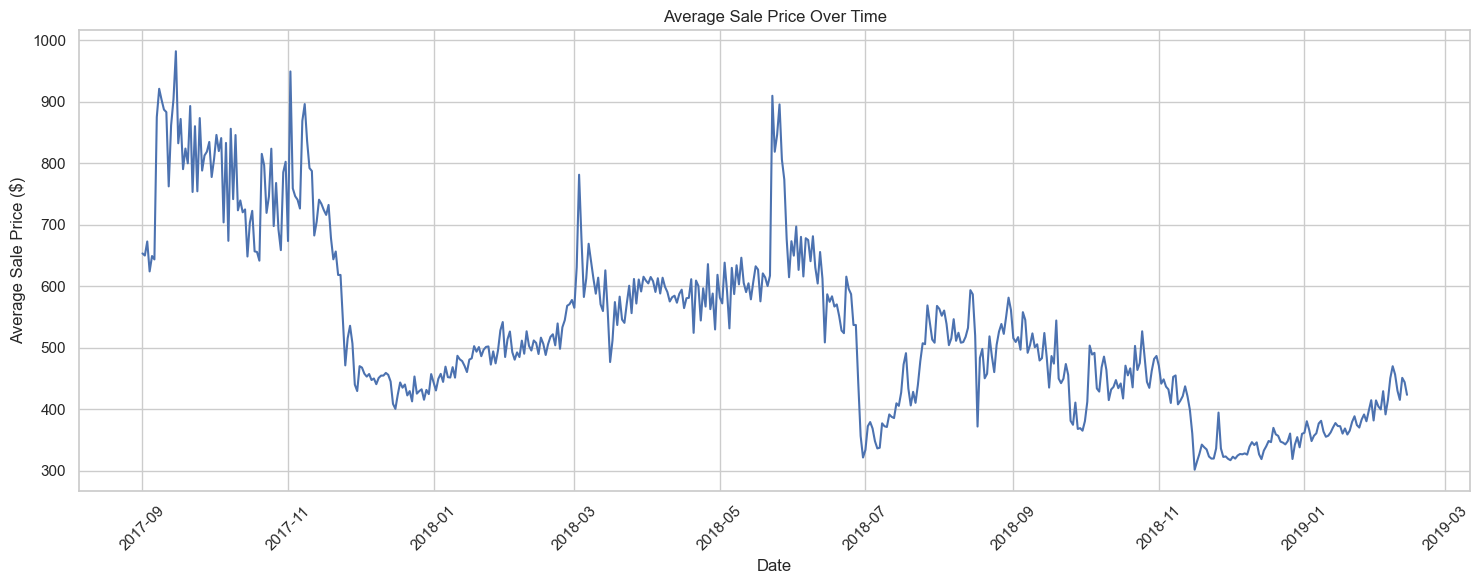

In [40]:
# Set the style for the plots
sns.set(style="whitegrid")

# Trends Over Time: Average Sale Price over Time
# 가설: 스니커즈의 평균 판매 가격은 어떻게 변화하였나
# 독립변수는 시간(날짜), 종속변수는 평균 판매 가격
# 이를 통해 시장의 변화를 예측하고, 가격 전략을 조정가능


# Grouping the data by Order Date and calculating the mean sale price for each date
trends_data = df.groupby('Order Date')['Sale Price'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(15, 6))
sns.lineplot(x='Order Date', y='Sale Price', data=trends_data)
plt.title('Average Sale Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sale Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

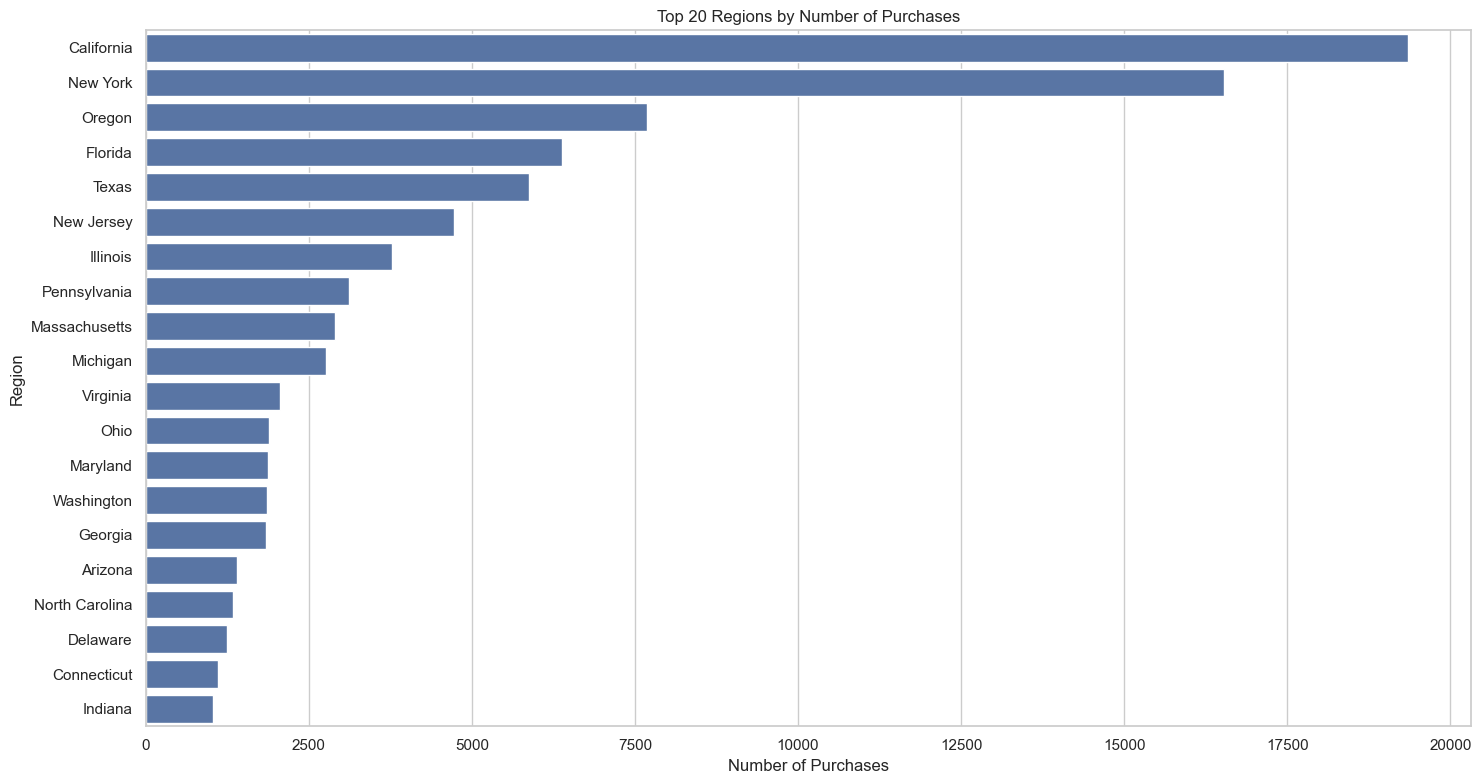

In [32]:
# Regional Analysis: Distribution of Buyers Across Regions
# 가설: 어느 지역에서 가장 많은 스니커즈 구매가 이루어졌나?
# 독립변수는 구매자의 지역, 종속변수는 구매 횟수
# 인사이트: 지역별 마케팅 전략을 세우기

# Counting the number of purchases from each region
regional_data = df['Buyer Region'].value_counts().reset_index()
regional_data.columns = ['Region', 'Number of Purchases']

# Plotting the regional distribution
plt.figure(figsize=(15, 8))
sns.barplot(x='Number of Purchases', y='Region', data=regional_data.head(20))  # Top 20 regions
plt.title('Top 20 Regions by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

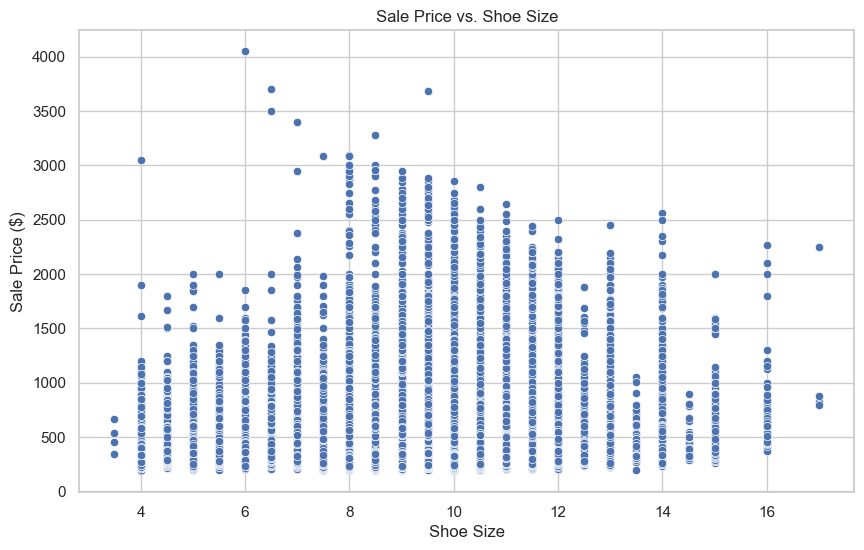

(None, 0.0827950921472585)

In [36]:
# Size Analysis: Correlation between Shoe Size and Sale Price
# 가설: 신발 사이즈가 판매 가격에 영향을 미칠까?
# 독립변수는 신발 사이즈, 종속변수는 판매 가격
# 결론을 보면 신발 사이즈를 중요한 요인으로 고려하지 않아도 됨

# Scatter plot of Sale Price vs. Shoe Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shoe Size', y='Sale Price', data=df)
plt.title('Sale Price vs. Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Sale Price ($)')

# Calculating the correlation coefficient
correlation = df['Sale Price'].corr(df['Shoe Size'])

plt.show(), correlation #결론: 신발 사이즈가 판매 가격에 큰 영향을 미치지 않음

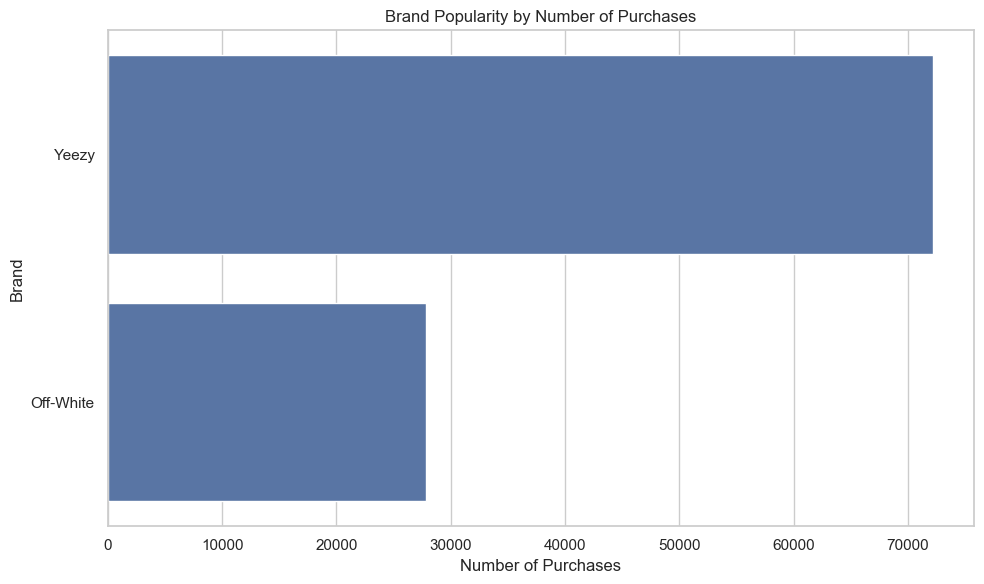

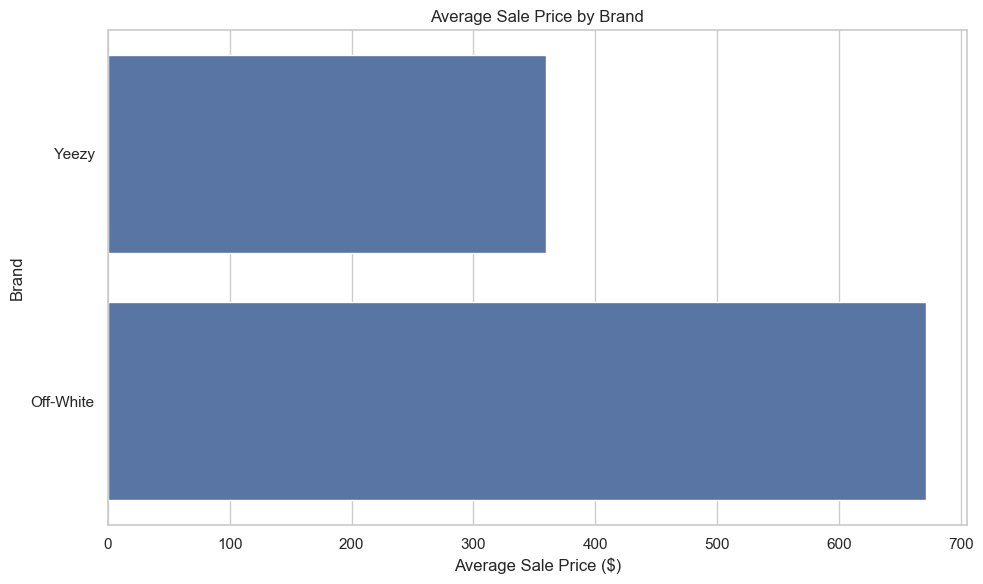

In [39]:
# Brand Analysis
# 브랜드별로 스니커즈의 인기도와 평균 판매 가격은 어떻게 다를까?
# 독립변수: 브랜드, 종속변수: 구매 횟수(인기도), 평균 판매 가격
# 얻을 수 있느 인사이트: 데이터를 바탕으로, 특정 브랜드의 마케팅 전략을 세우기

# 1. Brand Popularity: Number of Purchases for Each Brand
brand_popularity = df['Brand'].value_counts().reset_index()
brand_popularity.columns = ['Brand', 'Number of Purchases']

# 2. Average Sale Price by Brand: Comparing Average Prices
average_price_by_brand = df.groupby('Brand')['Sale Price'].mean().reset_index()

# Plotting Brand Popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='Number of Purchases', y='Brand', data=brand_popularity)
plt.title('Brand Popularity by Number of Purchases')
plt.xlabel('Number of Purchases')
plt.ylabel('Brand')
plt.tight_layout()

# Plotting Average Sale Price by Brand
plt.figure(figsize=(10, 6))
sns.barplot(x='Sale Price', y='Brand', data=average_price_by_brand)
plt.title('Average Sale Price by Brand')
plt.xlabel('Average Sale Price ($)')
plt.ylabel('Brand')
plt.tight_layout()

plt.show()